## Residential properties Analysis
In this part of the lab, we analyze a real estate dataset focusing on the SalePrice of residential properties. The goal is to investigate whether home prices differ significantly across neighborhoods and whether the distribution of sale prices meets the assumption of normality. This exercise simulates real-world scenarios in housing markets where data distributions are often skewed due to outliers and varying property characteristics.

We will begin with visual and statistical checks for normality, apply transformations as needed, and conduct a two-sample hypothesis test to compare average log-transformed prices between two neighborhoods.

🔷 Objective <BR><BR>
✅ Load the housing dataset and explore SalePrice.

✅ Perform Shapiro-Wilk test, Q-Q plot, and histogram to assess normality.

✅ Apply logarithmic transformation to normalize the data.

✅ Conduct t-tests (standard and Welch’s) to compare means of log prices between two neighborhoods (NAmes vs CollgCr).

✅ Visualize results with confidence intervals, violin plots, and boxplots.

✅ Interpret p-values, test statistics, and confidence intervals to support or reject the null hypothesis.



1.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('properties.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['SalePrice'])
print(f'Statistic={stat}, p={p}')

print(p<0.05)

Statistic=0.8696714665902145, p=3.2061412312021656e-33
True


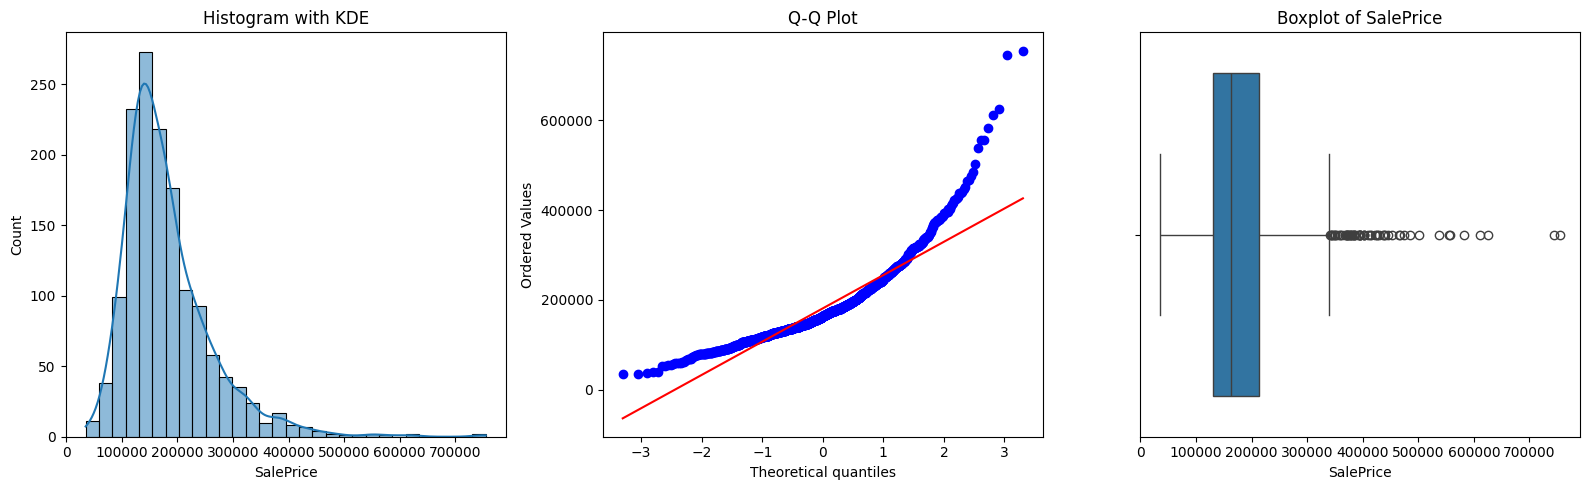

In [ ]:
#Shapiro Wilk test visuals
from scipy.stats import probplot



plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Histogram with KDE')

plt.subplot(1, 3, 2)
probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of SalePrice')

plt.tight_layout()
plt.show()


1. Tells you that SalePrice is statistically not normally distributed.
The null hypothesis of the Shapiro-Wilk test is: “The data is normally distributed.”
A p-value < 0.05 → You reject that hypothesis ⇒ Data is not normal.
2. Histogram/KDE
Visually shows right skewness, which means many houses have moderate prices, and a few have very high prices (long right tail).
3. Q-Q Plot
Further confirms non-normality, especially in the tails .
Shows the data deviates from a normal distribution at specific quantiles.
4. Boxplot
The outliers, signiicantly affect both normality and modeling accuracy.

In [ ]:
from scipy.stats import skew, kurtosis

saleprice_skew = skew(df['SalePrice'])
saleprice_kurt = kurtosis(df['SalePrice'])

print(f"Skewness of SalePrice: {saleprice_skew:.4f}")
print(f"Kurtosis of SalePrice (excess): {saleprice_kurt:.4f}")


Skewness of SalePrice: 1.8809
Kurtosis of SalePrice (excess): 6.5098


Skewness > 0 (positive skew)<br>
Kurtosis > 0 (leptokurtic with heavy tails (long and narrow), indicating many extreme values)<br>
Extreme values for skewness (e.g., > 1 or < -1) or kurtosis (e.g., > 4 or < 2) suggest a non-normal distribution.

In [ ]:
# logarithmic transformation to make it more normal

df['LogSalePrice'] = np.log(df['SalePrice'])


#  skewness and kurtosis again
log_saleprice_skew = skew(df['LogSalePrice'])
log_saleprice_kurt = kurtosis(df['LogSalePrice'], fisher=True)

print(f"Skewness of LogSalePrice: {log_saleprice_skew:.4f}")
print(f"Kurtosis of LogSalePrice (excess): {log_saleprice_kurt:.4f}")


Skewness of LogSalePrice: 0.1212
Kurtosis of LogSalePrice (excess): 0.8027


* Both skewness and kurtosis closer to 0 in log transformed data.

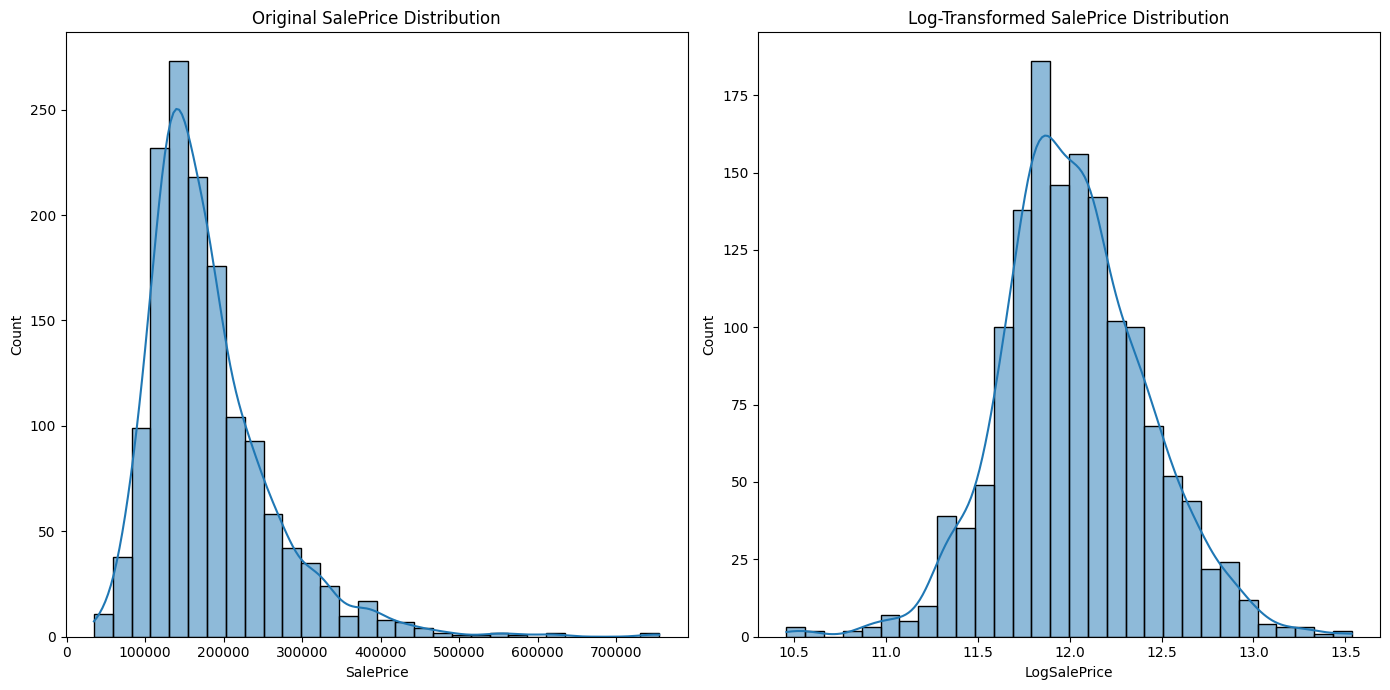

In [ ]:

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Original SalePrice Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['LogSalePrice'], kde=True, bins=30)
plt.title('Log-Transformed SalePrice Distribution')

plt.tight_layout()
plt.show()


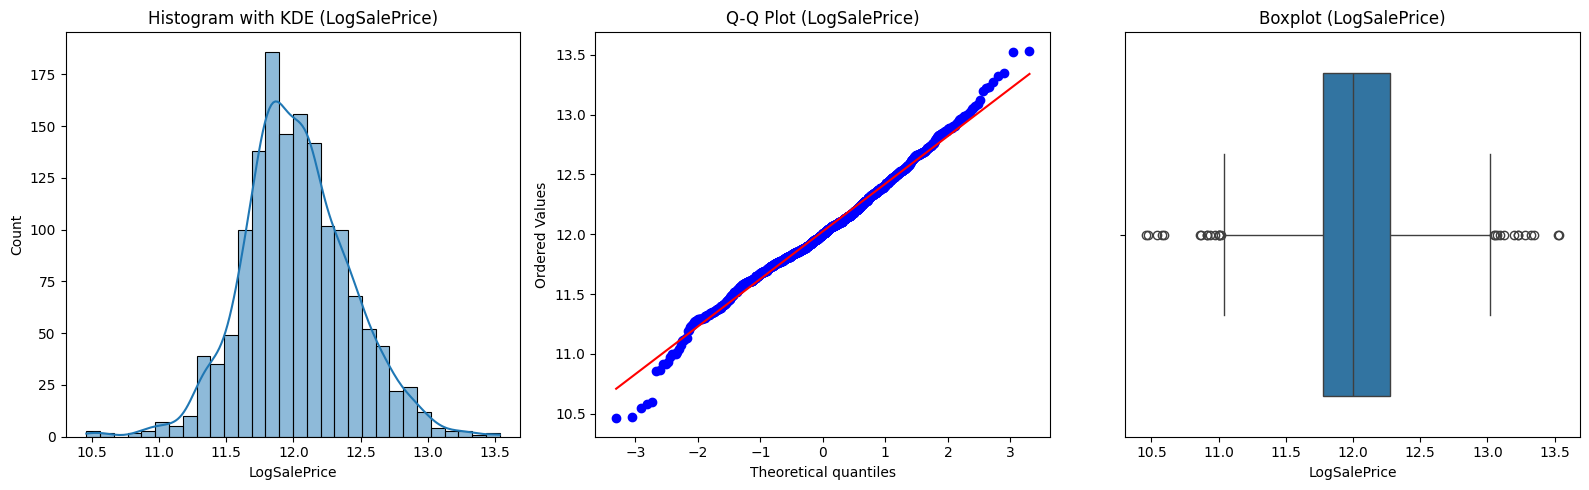

In [ ]:
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['LogSalePrice'], kde=True, bins=30)
plt.title('Histogram with KDE (LogSalePrice)')

plt.subplot(1, 3, 2)
probplot(df['LogSalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot (LogSalePrice)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['LogSalePrice'])
plt.title('Boxplot (LogSalePrice)')

plt.tight_layout()
plt.show()

In [ ]:
df.Neighborhood.unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [ ]:
from scipy.stats import ttest_ind

tt_stat, p_val = ttest_ind(df[df['Neighborhood'] == 'NAmes']['LogSalePrice'],
                           df[df['Neighborhood'] == 'CollgCr']['LogSalePrice'])

print(f'T-statistic: {tt_stat:.4f}, p-value: {p_val:.4f}')


T-statistic: -12.3603, p-value: 0.0000


 1. P-value:

* P-value = 0.0000 (less than 0.05) means you reject the null hypothesis.<br>
* Null hypothesis (H₀): There is no significant difference between the * * LogSalePrice of the two neighborhoods.<br>
* Alternative hypothesis (H₁): There is a significant difference between the LogSalePrice of the two neighborhoods.<br>

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that the log-transformed sale prices of the two neighborhoods are statistically significantly different.<br><br>

2. T-statistic:

* The t-statistic of -12.3603 indicates the magnitude of the difference between the means of the two groups in standard deviation units.
* A large negative t-statistic suggests that the mean LogSalePrice in NAmes is significantly lower than in CollgCr.

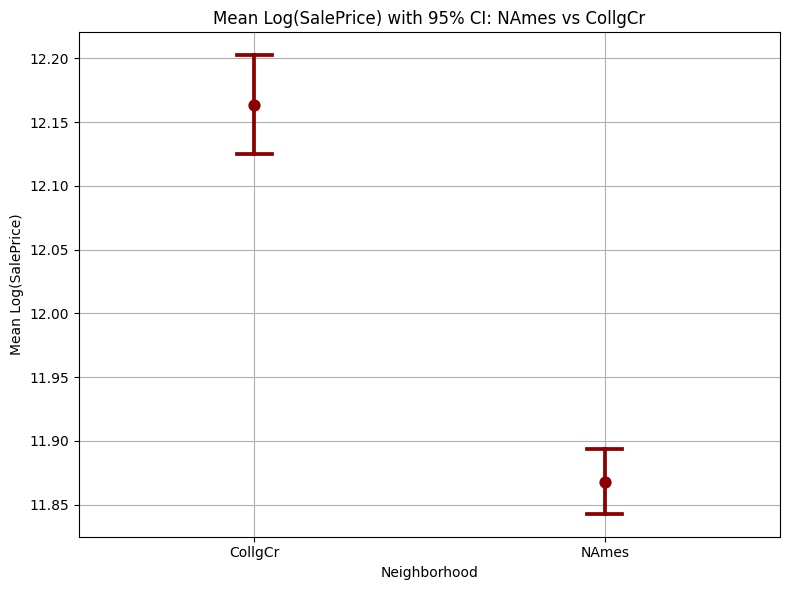

In [ ]:

subset = df[df['Neighborhood'].isin(['NAmes', 'CollgCr'])]

# plot 95% CI error bars
plt.figure(figsize=(8, 6))
sns.pointplot(x='Neighborhood', y='LogSalePrice', data=subset,
              errorbar=('ci', 95), capsize=0.1, linestyle='none', color='darkred')

plt.title('Mean Log(SalePrice) with 95% CI: NAmes vs CollgCr')
plt.ylabel('Mean Log(SalePrice)')
plt.xlabel('Neighborhood')
plt.grid(True)
plt.tight_layout()
plt.show()


* The error bars show the 95% confidence interval around each mean.
* The error bars do not overlap, it's a strong visual indication of statistical significance.

In [ ]:
# Sample variances

na_log = df[df['Neighborhood'] == 'NAmes']['LogSalePrice']
collgcr_log = df[df['Neighborhood'] == 'CollgCr']['LogSalePrice']

var_na = na_log.var()
var_collgcr = collgcr_log.var()

print(f"Variance (NAmes): {var_na:.4f}")
print(f"Variance (CollgCr): {var_collgcr:.4f}")


Variance (NAmes): 0.0426
Variance (CollgCr): 0.0647


In [ ]:
from scipy.stats import ttest_ind

# Standard t-test (assumes equal variances)
t_eq, p_eq = ttest_ind(na_log, collgcr_log, equal_var=True)

# Welch's t-test (assumes unequal variances)
t_uneq, p_uneq = ttest_ind(na_log, collgcr_log, equal_var=False)

print("== Standard T-Test (Equal Variances) ==")
print(f"T-statistic: {t_eq:.4f}, P-value: {p_eq:.4e}")

print("\n== Welch's T-Test (Unequal Variances) ==")
print(f"T-statistic: {t_uneq:.4f}, P-value: {p_uneq:.4e}")


== Standard T-Test (Equal Variances) ==
T-statistic: -12.3603, P-value: 1.1900e-29

== Welch's T-Test (Unequal Variances) ==
T-statistic: -11.8601, P-value: 1.8639e-26


There is a statistically significant difference in log sale prices between NAmes and CollgCr. The difference is not likely due to random chance (since the p-values are so small).

<ipython-input-14-14ac5c9c6320>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Neighborhood', y='LogSalePrice', data=subset, inner='box', palette='Set2')


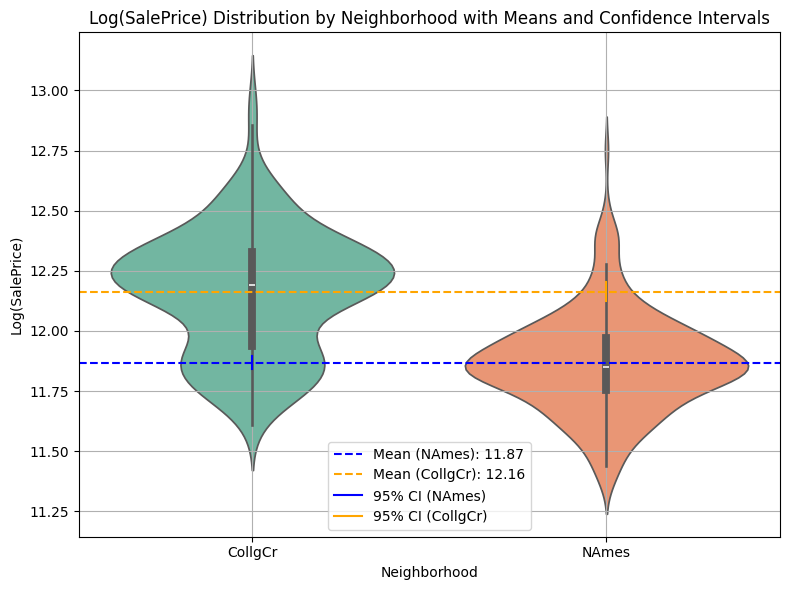

In [ ]:
from scipy.stats import t


#  plotting
subset = df[df['Neighborhood'].isin(['NAmes', 'CollgCr'])]

plt.figure(figsize=(8, 6))
sns.violinplot(x='Neighborhood', y='LogSalePrice', data=subset, inner='box', palette='Set2')

mean_na = na_log.mean()
mean_collgcr = collgcr_log.mean()

plt.axhline(mean_na, color='blue', linestyle='--', label=f'Mean (NAmes): {mean_na:.2f}')
plt.axhline(mean_collgcr, color='orange', linestyle='--', label=f'Mean (CollgCr): {mean_collgcr:.2f}')


df_na = len(na_log) - 1
df_collgcr = len(collgcr_log) - 1

sem_na = na_log.sem()
sem_collgcr = collgcr_log.sem()

ci_na = t.interval(0.95, df_na, loc=mean_na, scale=sem_na)
ci_collgcr = t.interval(0.95, df_collgcr, loc=mean_collgcr, scale=sem_collgcr)

plt.plot([0, 0], [ci_na[0], ci_na[1]], color='blue', label=f'95% CI (NAmes)')
plt.plot([1, 1], [ci_collgcr[0], ci_collgcr[1]], color='orange', label=f'95% CI (CollgCr)')

plt.title('Log(SalePrice) Distribution by Neighborhood with Means and Confidence Intervals')
plt.ylabel('Log(SalePrice)')
plt.xlabel('Neighborhood')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
